# Aula 1 - Pandas

## Parte 1 - Analise funcionarios publicos de MG com Pandas

### Iniciando com carga no dataframe

In [ ]:
# carregar as libs
import pandas as pd
import numpy as np

In [ ]:
# iniciando a carga
pd.read
df = pd.read_csv('/content/remuneracao-2.csv', sep=';', encoding='cp1252', usecols = [1, 2, 3, 6, 8, 9])

FileNotFoundError: ignored

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.columns = ['Nome', 'Status', 'Ocupação', 'Instituição', 'Horas', 'Salário']

In [ ]:
df.info()

In [ ]:
df['Salário'] = df['Salário'].astype(str).str.replace('.', '').str.replace(',', '.').astype('float')
df.head(3)

In [ ]:
df['Salário'].sum()

In [ ]:
df.describe()

In [ ]:
# maior salário
df['Salário'].max()

In [ ]:
# como podemos fazer para descobrir o nome, ocupação e o salario menor
df[df['Salário'] == df['Salário'].min()][['Nome', 'Ocupação', 'Salário']]

In [ ]:
df[df['Salário'] == df['Salário'].max()][['Nome', 'Ocupação', 'Salário']]

In [ ]:
df[df['Ocupação'].str.contains('AUDITOR', na=False)]

In [ ]:
# encontrar registros com salários maiores do que 15 mil reais
df[df['Salário'] > 15000].sort_values('Salário', ascending=False)

In [ ]:
# total de salário pago
df['Salário'].sum()

In [ ]:
#verificando a relação do total dos salários dos autorios em função do total de salario pagos
total_auditor = df[df['Ocupação'].str.contains('AUDITOR', na=False)]['Salário'].sum()
total_geral_salario = df['Salário'].sum()

In [ ]:
relacao_salario_porc = (total_auditor/total_geral_salario)*100
print("%.2f" % relacao_salario_porc)

In [ ]:
df.info()

In [ ]:
#relacionando valor hora
valor_hora_geral = df['Salário'].sum() / df['Horas'].sum()
print(valor_hora_geral)

In [ ]:
df['Valor_Hora'] = df['Salário'] / df['Horas']
df.info()

## Parte 2 - Analise eleitorado em 2018 com pandas

In [ ]:
#carrega o arquivo eleitordo para um dataframe
df = pd.read_csv('/content/eleitorado_municipio_2018.csv', sep=';', encoding='cp1252')
df.sample(3)

In [ ]:
# quantidade de eleitoras
quantidade_de_eleitoras = df['QTD_ELEITORES_FEMININO'].sum()
print('Quantidade de mulheres no total: ' + str(quantidade_de_eleitoras))

# quantidade por região
print('Quantidade de eleitores por região:')
print(df.groupby('NM_REGIAO')['QTD_ELEITORES_FEMININO'].sum())

# relação de eleitores masculinos / total eleitores
total_de_eleitores = df['QTD_ELEITORES'].sum()
print('Total de eleitores: ' + str(total_de_eleitores))
print('Quantidade de mulheres nas eleições: ' + str((quantidade_de_eleitoras / total_de_eleitores * 100).round(2)) + '%')
# relação de eleitores femininos / total eleitores

In [ ]:
quantidade_deficientes_por_geral = ((df['QTD_ELEITORES_DEFICIENTE'].sum() / df['QTD_ELEITORES'].sum())*100).round(2)
print(quantidade_deficientes_por_geral)

# Aula 2 - Matplotlib

## Parte 1 - Analise de dados de Temperatura Momentanea

In [ ]:
#imports
import pandas as pd
df = pd.read_csv('/content/monitoramento_tempo.csv')
df.head()

In [ ]:
df.info()

In [ ]:
df['data'] = pd.to_datetime(df['data'])

In [ ]:
df.info()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['data'], df['temperatura'])

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df.data, df.temperatura)
plt.title('Temperatura Momentania')

In [ ]:
fig = plt.figure(figsize=(15,8))
fig.set_facecolor('white')
ex = fig.add_axes([0.4, 0.5, 1, 1])
ex.plot(df.data,df.temperatura, color='g', ls='dotted')
ex.set_title('Temperatura Momentanea', fontsize=30)
ex.set_ylabel('Temperatura', fontsize=18)
ex.set_xlabel('Data', fontsize=18)
ex.legend(['Temperatura'], fontsize=15, loc='lower left')

In [ ]:
import datetime
fig = plt.figure(figsize=(15,8))
fig.set_facecolor('white')
ex = fig.add_axes([0, 0, 1, 1])
ex.plot(df.data, df.temperatura, color='g', marker='o')

ex.set_xlim(datetime.datetime(2016, 1, 1), datetime.datetime(2017, 1, 1))
ex.grid(True)

In [ ]:
fig = plt.figure(figsize=(15, 8))
fig.set_facecolor('white')

ex1 = fig.add_axes([0, 0, 1, 1])
ex1.set_title('Temperatura Momentanea do mês de maio/2016', fontsize=30)
ex1.set_ylabel('Temperatura', fontsize=18)
ex1.set_xlabel('Data', fontsize=18)
ex1.legend(['Temperatura'], fontsize=15, loc='lower left')
ex1.grid(True)
ex1.plot(df.data, df.temperatura, color='g')

ex2 = fig.add_axes([0.1, 0.5, 0.4, 0.4])
ex2.plot(df.data, df.temperatura)
ex2.set_title('Temperatura Momentanea geral', fontsize=12)
ex2.set_ylabel('Temperatura', fontsize=8)
ex2.set_xlabel('Data', fontsize=8)
ex2.legend(['Temperatura'], fontsize=15, loc='lower left')

In [ ]:
fig = plt.figure(figsize=(15, 8))
fig.set_facecolor('white')

ex1 = fig.add_axes([0, 0, 1, 1])
ex1.set_xlim(datetime.datetime(2016, 5, 1), datetime.datetime(2016, 6, 1))
ex1.set_title('Temperatura Momentanea do mês de maio/2016', fontsize=30)
ex1.set_ylabel('Temperatura', fontsize=18)
ex1.set_xlabel('Data', fontsize=18)
ex1.legend(['Temperatura'], fontsize=15, loc='lower left')
ex1.grid(True)
ex1.plot(df.data, df.temperatura, color='g')

intervalo_menor = df.data < datetime.datetime(2016, 5, 1)
intervalo_maior = df.data > datetime.datetime(2016, 5, 31)

ex2 = fig.add_axes([0.7, 0.08, 0.3, 0.3])

ex2.plot(df.data, df.temperatura, color='g')
ex2.plot(df[intervalo_menor]['data'], df[intervalo_menor]['temperatura'], color='b')
ex2.plot(df[intervalo_maior]['data'], df[intervalo_maior]['temperatura'], color='b')

ex2.set_xlim(datetime.datetime(2016, 1, 1), datetime.datetime(2017, 1, 1))
ex2.set_title('Temperatura Momentanea geral no ano de 2016', fontsize=12)
ex2.set_ylabel('Temperatura', fontsize=8)
ex2.set_xlabel('Data', fontsize=8)
ex2.legend(['Temperatura'], fontsize=6, loc='upper left')

In [ ]:
fig = plt.figure(figsize=(15,8))
fig.set_facecolor('white')
ex = fig.add_axes([0.4, 0.5, 1, 1])
ex.plot(df.data,df.temperatura, color='g')
ex.set_title('Temperatura Momentanea', fontsize=30)
ex.set_ylabel('Temperatura', fontsize=18)
ex.set_xlabel('Data', fontsize=18)
ex.legend(['Temperatura'], loc='best', fontsize=15)

x_anotacao = df['data'][df['temperatura'].idxmax()]
y_anotacao = max(df.temperatura)

x_arrow_max = df['data'][df['temperatura'].idxmax()-7000]
y_arrow_max = max(df.temperatura)-4

x_anotacao_min = df['data'][df['temperatura'].idxmin()]
y_anotacao_min = min(df.temperatura)

x_arrow_min = df['data'][df['temperatura'].idxmin()+3500]
y_arrow_min = min(df.temperatura)+4

ex.annotate('Temp Max', xy=(x_anotacao, y_anotacao), fontsize=15,
            xytext=(x_arrow_max, y_arrow_max), arrowprops=dict(facecolor='k'))

ex.annotate('Temp Min', xy=(x_anotacao_min, y_anotacao_min), fontsize=15,
            xytext=(x_arrow_min, y_arrow_min), arrowprops=dict(facecolor='k'))

ex.axhline(max(df.temperatura), color='k', linestyle='--')
ex.axhline(min(df.temperatura), color='k', linestyle='--')

In [ ]:
temperatura_dia_semana = df.groupby('dia_da_semana')['temperatura'].mean()
temperatura_dia_semana

In [ ]:
nomes_dias = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
temperatura_dia_semana = temperatura_dia_semana[nomes_dias]
temperatura_dia_semana

In [ ]:
fig = plt.figure(figsize=(15,8))
fig.set_facecolor('white')
ex = fig.add_axes([0, 0, 1, 1])
indice_x = range(len(temperatura_dia_semana))
ex.bar(indice_x, temperatura_dia_semana)
ex.set_xticks(indice_x)
ex.set_xticklabels(nomes_dias)

ex.set_title('Temperatura média nos dias da semana', fontsize=15)
ex.set_ylabel('Temperatura', fontsize=15)
ex.set_xlabel('Dias', fontsize=15)

In [ ]:
fig = plt.figure(figsize=(15,8))
fig.set_facecolor('white')
ex = fig.add_axes([0, 0, 1, 1])
indice_x = range(len(temperatura_dia_semana))
cores = ['c', 'peru', 'm', 'plum']
ex.bar(indice_x, temperatura_dia_semana, color=cores)
ex.set_xticks(indice_x)
ex.set_xticklabels(nomes_dias)

ex.set_title('Temperatura média nos dias da semana', fontsize=15)
ex.set_ylabel('Temperatura', fontsize=15)
ex.set_xlabel('Dias', fontsize=15)

In [ ]:
temperatura_dia_semana

In [ ]:
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('white')
ex = fig.add_axes([0, 0, 1, 1])

ex.pie(temperatura_dia_semana, labels=nomes_dias, autopct='%.1f%%')
ex.set_title('Temperatura nos dias de semana', fontsize=15)

In [ ]:
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('white')
ex = fig.add_axes([0, 0, 1, 1])

separar = [0, 0.1, 0, 0.1, 0, 0.1, 0]

ex.pie(temperatura_dia_semana, labels=nomes_dias, autopct='%.1f%%', explode=separar)
ex.set_title('Temperatura nos dias de semana', fontsize=15)

In [ ]:
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('white')
ex = fig.add_axes([0, 0, 1, 1])

separar = [0, 0.1, 0, 0, 0, 0, 0]

ex.pie(temperatura_dia_semana, labels=nomes_dias, autopct='%.1f%%', explode=separar, shadow=True)
ex.set_title('Temperatura nos dias de semana', fontsize=15)

fig.savefig('grafico_pie_semana.png')

## Parte 2 - Covid 19

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/caso.csv')
df.head()

In [ ]:
df.info()

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.info()

In [ ]:
estados = pd.DataFrame()
estados = df.loc[(df.place_type == 'state')]

In [ ]:
estados.head()

In [ ]:
confirmados_em_sp = estados.loc[estados.state == 'SP']['confirmed'].max()
mortes_em_sp = estados.loc[estados.state == 'SP']['deaths'].max()
relacao = (mortes_em_sp/confirmados_em_sp)*100
print('Relação mortos confirmados %.2f%%' % relacao)

In [ ]:
df_estados = df.loc[(df.place_type=='state') & (df.is_last == True)]
df_estados

In [ ]:
df_estados = df.loc[df.place_type == 'state']
df_estados = df_estados[['date', 'state', 'confirmed', 'deaths', 'is_last']]
df_estados

In [ ]:
relacao_estados = pd.DataFrame()
estados = df_estados.loc[df.state == 'SP']
estados = estados.groupby('date').sum()['confirmed'].reset_index()
estados = estados.drop('date', axis=1)
estados.columns = ['SP']
relacao_estados = pd.concat([relacao_estados, estados], axis=1, ignore_index=False)

pd.

In [ ]:
estados = df_estados.loc[df.state == 'TO']
estados = estados.groupby('date').sum()['confirmed'].reset_index()
estados = estados.drop('date', axis=1)
estados.columns = ['TO']
relacao_estados = pd.concat([relacao_estados, estados], axis=1, ignore_index=False)

In [ ]:
relacao_estados

In [ ]:
relacao_estados.plot()

In [ ]:
# Função
# Uma função que receba uma lista de estados, número de dias desde o inicio e a situação
# ou mortos
estados = ['SP', 'MG', 'TO']
situacao = 'confirmed' # confirmed, deaths
relacao_estados = pd.DataFrame()

def comparacao_estados(dataframe, estados, numero_de_dias, situacao):
  casos = pd.DataFrame()
  for estado in estados:
    df = dataframe.loc[dataframe.state == estado]
    df = df.groupby('date').sum()[situacao].reset_index()
    df = df.drop('date', axis=1)
    casos = pd.concat([casos, df], axis=1, ignore_index=False)
  
  casos.columns = estados
  return casos.head(numero_de_dias)

relacao = comparacao_estados(df_estados, estados, 10, situacao)
relacao

In [ ]:
relacao.plot()

In [ ]:
# E para realizar a comparação entre duas ou mais cidades?
df_cidades = pd.DataFrame()
df_cidades = df.loc[df.place_type == 'city']
#df_cidades = df_cidades.groupby('date').sum()['confirmed'].reset_index()
#df_cidades = df_cidades.drop('date', axis=1)
df_cidades.columns

In [ ]:
cidades = ['Espírito Santo do Pinhal', 'Andradas', 'Poços de Caldas']
situacao = 'confirmed' # confirmed, deaths

def comparacao_cidades(dataframe, cidades, numero_de_dias, situacao):
  casos = pd.DataFrame()
  for cidade in cidades:
    df = dataframe.loc[dataframe.city == cidade]
    df = df.groupby('date').sum()[situacao].reset_index()
    df = df.drop('date', axis=1)
    casos = pd.concat([casos, df], axis=1, ignore_index=False)
  
  casos.columns = cidades
  return casos.head(numero_de_dias)

relacao = comparacao_cidades(df_cidades, cidades, 100, situacao)
relacao.plot()

# Penultima Aula

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as ampl
import matplotlib.pyplot as plt

In [ ]:
data = pd.Series([1, np.nan, 3.8, np.nan, 7])
data

0    1.0
1    NaN
2    3.8
3    NaN
4    7.0
dtype: float64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

0

In [ ]:
#fillna
#joga valores que nós determinamos  para os contéudos nulos

data.fillna(2.8)

0    1.0
2    3.8
4    7.0
dtype: float64

In [ ]:
data.fillna(2.8, inplace=True)
data

0    1.0
2    3.8
4    7.0
dtype: float64

In [ ]:
data = pd.DataFrame([[1, 3, np.nan],
                     [1, np.nan,3]],
                     columns=['Coluna 1', 'Coluna 2', 'Coluna 3'])
data

,Coluna 1,Coluna 2,Coluna 3
0,1,3.0,NaN
1,1,NaN,3.0


In [ ]:
data.fillna({'Coluna 2': 0.5, 'Coluna 3': 0.89}, inplace=True)
data

,Coluna 1,Coluna 2,Coluna 3
0,1,3.0,0.89
1,1,0.5,3.00


In [ ]:
#ffill
# o ffill copia valores da posição anterior de algum registro NaN para posição
# que tenha NaN

data - pd.DataFrame([[1, 3, 1],
                    [1, np.nan, np.nan],
                    [np.nan, np.nan, np.nan],
                    [3, 3, np.nan],
                    [np.nan, 3, np.nan]], columns=['Coluna 1', 'Coluna 2', 'Coluna 3'])

,Coluna 1,Coluna 2,Coluna 3
0,0.0,0.0,-0.11
1,0.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [ ]:
data['Coluna 1'].fillna(method='ffill', inplace=True)
data

,Coluna 1,Coluna 2,Coluna 3
0,1,3.0,0.89
1,1,0.5,3.00


In [ ]:
data.fillna(data['Coluna 1'].mean())

,Coluna 1,Coluna 2,Coluna 3
0,1,3.0,0.89
1,1,0.5,3.00


In [ ]:
data['Chave 2'].duplicated().sum()

In [ ]:
data = data['Coluna 1'].drop_duplicates()
data

0    1
Name: Coluna 1, dtype: int64

In [ ]:
data = pd.DataFrame({'comida': ['bacon', 'perfil', 'bacon', 'frango', 'asinha','bacon','file'],
                     'porcao': [4, 3, 5, 8, 6, 7, 6]})

In [ ]:
data

,comida,porcao
0,bacon,4
1,perfil,3
2,bacon,5
3,frango,8
4,asinha,6
5,bacon,7
6,file,6


In [ ]:
tipo_animal = {'bacon':'porco',
               'frango':'ave',
               'pernil': 'porco'}
tipo_animal

{'bacon': 'porco', 'frango': 'ave', 'pernil': 'porco'}

In [ ]:
data['Tipo'] = data['comida'].map(tipo_animal)
data

,comida,porcao,Tipo
0,bacon,4,porco
1,perfil,3,NaN
2,bacon,5,porco
3,frango,8,ave
4,asinha,6,NaN
5,bacon,7,porco
6,file,6,NaN


In [ ]:
data['comida'] = data['comida'].str.lower()

In [ ]:
data

,comida,porcao,Tipo
0,bacon,4,porco
1,perfil,3,NaN
2,bacon,5,porco
3,frango,8,ave
4,asinha,6,NaN
5,bacon,7,porco
6,file,6,NaN


In [ ]:
data['Tipo'] = data['comida'].map(tipo_animal)
data

,comida,porcao,Tipo
0,bacon,4,porco
1,perfil,3,NaN
2,bacon,5,porco
3,frango,8,ave
4,asinha,6,NaN
5,bacon,7,porco
6,file,6,NaN


In [ ]:
df = pd.Series([1, 2, -999, -1000, 3])
df

0       1
1       2
2    -999
3   -1000
4       3
dtype: int64

In [ ]:
idades = [20.3, 22.854, 25, 27.854, 21, 23, 37.854, 31, 61, 45, 41, 32, 21.854]
idades

[20.3, 22.854, 25, 27.854, 21, 23, 37.854, 31, 61, 45, 41, 32, 21.854]

In [ ]:
# utilizando a função cut
# transforma valores continuos em valores discretos
bins = [18, 25, 35, 60, 100]
bins

[18, 25, 35, 60, 100]

In [ ]:
resultado = pd.cut(idades, bins)
resultado

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (60, 100], (35, 60], (35, 60], (25, 35], (18, 25]]
Length: 13
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [ ]:
resultado.value_counts()

(18, 25]     6
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [ ]:
labels = ['De 18 a 25', 'De 25 a 35', 'De 35 a 60', 'De 60 a 100']
labels

['De 18 a 25', 'De 25 a 35', 'De 35 a 60', 'De 60 a 100']

In [ ]:
resultado.value_counts()

## Convertendo varivaeis categoricas em matriz binária

In [ ]:
df = pd.DataFrame({'Chave':['b', 'b', 'a', 'c', 'a', 'b'], 'dados':range(6)})
df

,Chave,dados
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [ ]:
pd.get_dummies(df['Chave'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [ ]:
resultado = pd.get_dummies(df['Chave'], prefix='cat')
resultado

,cat_a,cat_b,cat_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [ ]:
df_composicao = df[['dados']].join(resultado)
df_composicao

,dados,cat_a,cat_b,cat_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


## Manipulação de strings

In [ ]:
var = 'a, b, python     '
var

'a, b, python     '

In [ ]:
print(var.split(','))

['a', ' b', ' python']


In [ ]:
tratamento = [x.strip() for x in var.split(',')]
tratamento

['a', 'b', 'python']

In [ ]:
var = ['lalala', 'aaaaaa', 'aaaaaa']
var

['lalala', 'aaaaaa', 'aaaaaa']

In [ ]:
var.count('jose')

0

#  Trabalhando com Seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.info()

df.head(0)

df['day'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [ ]:
TraducaoColuna = {'total_bill':'Total','tip':'Gorgeta','sex':'Genero','smoker':'Fumante','day':'DiaSemana','time':'Horario','size':'Qtd'}
TraducaoColuna

gor = df.rename( columns = TraducaoColuna)

f_m={'Female':'feminino','Male':'Masculino'}
f_m

gor.Genero = gor.Genero.map(f_m)
gor

,Total,Gorgeta,Genero,Fumante,DiaSemana,Horario,Qtd
0,16.99,1.01,feminino,No,Sun,Dinner,2
1,10.34,1.66,Masculino,No,Sun,Dinner,3
2,21.01,3.50,Masculino,No,Sun,Dinner,3
3,23.68,3.31,Masculino,No,Sun,Dinner,2
4,24.59,3.61,feminino,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Masculino,No,Sat,Dinner,3
240,27.18,2.00,feminino,Yes,Sat,Dinner,2
241,22.67,2.00,Masculino,Yes,Sat,Dinner,2
242,17.82,1.75,Masculino,No,Sat,Dinner,2


In [ ]:
gor.Fumante.unique()

sim_nao = {'No':'Não','Yes':'Sim'}

gor.DiaSemana.unique()

dias_semana={'Sun':'Domingo','Sat':'Sabado','Fri':'Sexta','Thur':'Quinta'}

gor.Horario.unique()

periodo={'Dinner':'Jantar','Lunch':'Almoco'}

gor.Diasemana = gor.DiaSemana.map(dias_semana)

gor

,Total,Gorgeta,Genero,Fumante,DiaSemana,Horario,Qtd
0,16.99,1.01,feminino,No,Sun,Dinner,2
1,10.34,1.66,Masculino,No,Sun,Dinner,3
2,21.01,3.50,Masculino,No,Sun,Dinner,3
3,23.68,3.31,Masculino,No,Sun,Dinner,2
4,24.59,3.61,feminino,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Masculino,No,Sat,Dinner,3
240,27.18,2.00,feminino,Yes,Sat,Dinner,2
241,22.67,2.00,Masculino,Yes,Sat,Dinner,2
242,17.82,1.75,Masculino,No,Sat,Dinner,2


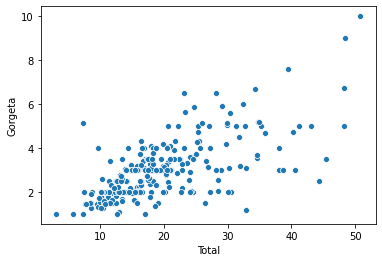

In [ ]:
sns.scatterplot(x='Total', y='Gorgeta', data=gor)

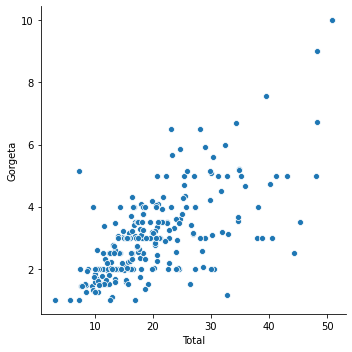

In [ ]:
sns.relplot(x='Total', y='Gorgeta', data=gor)

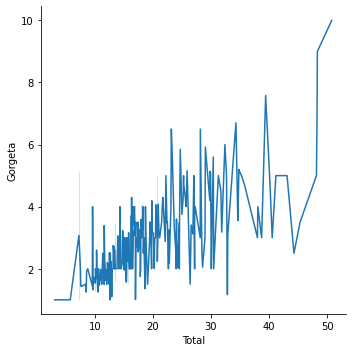

In [ ]:
sns.relplot(x='Total', y='Gorgeta', data=gor, kind='line')

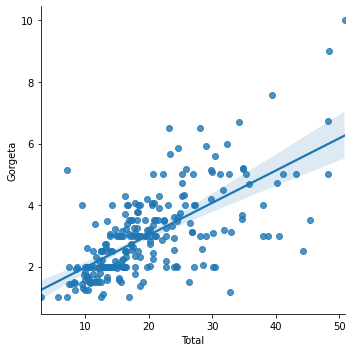

In [ ]:
# Gráfico de pontos com reta linear
sns.lmplot(x='Total', y='Gorgeta', data=gor)

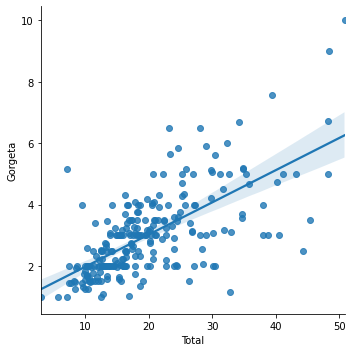

In [ ]:
sns.lmplot(x='Total', y='Gorgeta', data=gor)

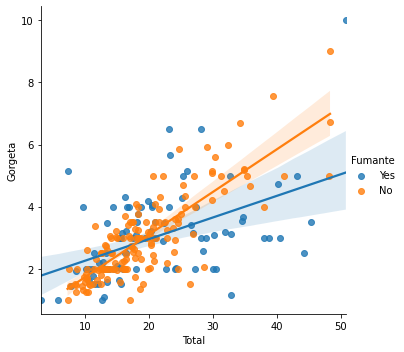

In [ ]:
sns.lmplot(x='Total', y='Gorgeta', data=gor, hue='Fumante')

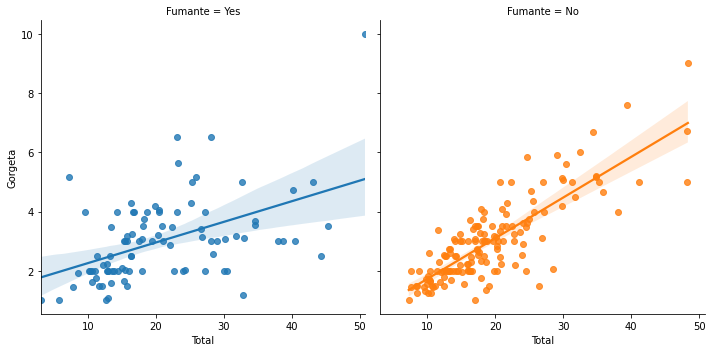

In [ ]:
# hue detona os pontos no gráfico de acordo com as categorias de uma 
# determinada coluna do data frame já o col, faz a divisão
sns.lmplot(x='Total', y='Gorgeta', data=gor, hue='Fumante', col='Fumante')

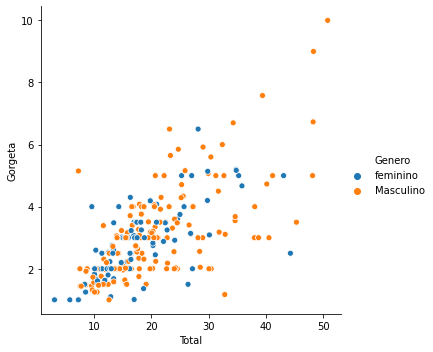

In [ ]:
sns.relplot(x='Total', y='Gorgeta', data=gor, hue='Genero')

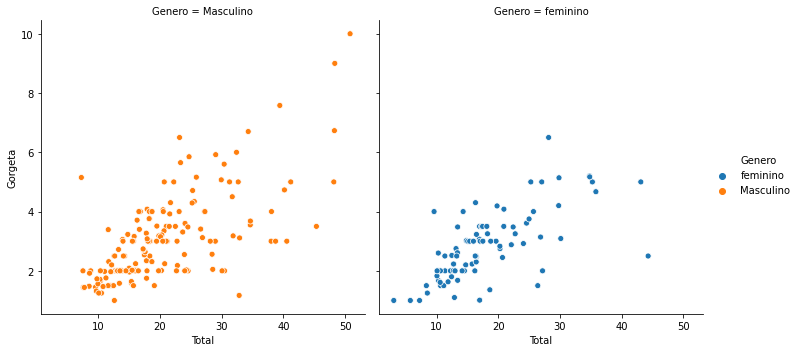

In [ ]:
sns.relplot(x='Total', y='Gorgeta', data=gor, hue='Genero', col='Genero')

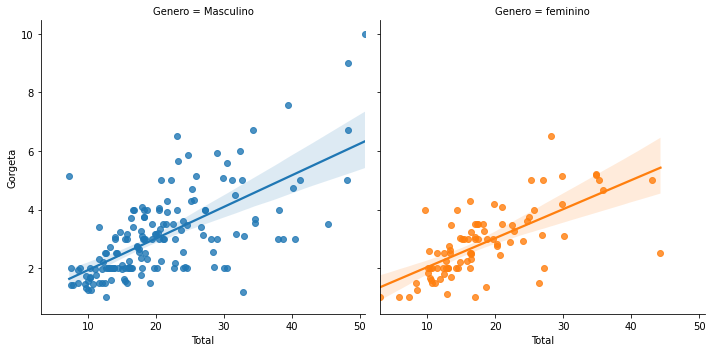

In [ ]:
sns.lmplot(x='Total', y='Gorgeta', data=gor, hue='Genero', col='Genero')

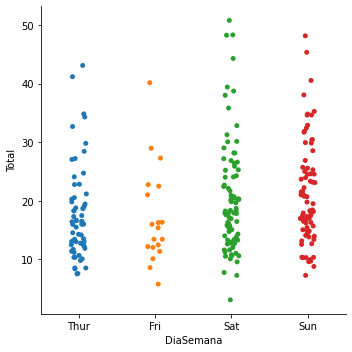

In [ ]:
sns.catplot(x='DiaSemana', y='Total', data=gor)

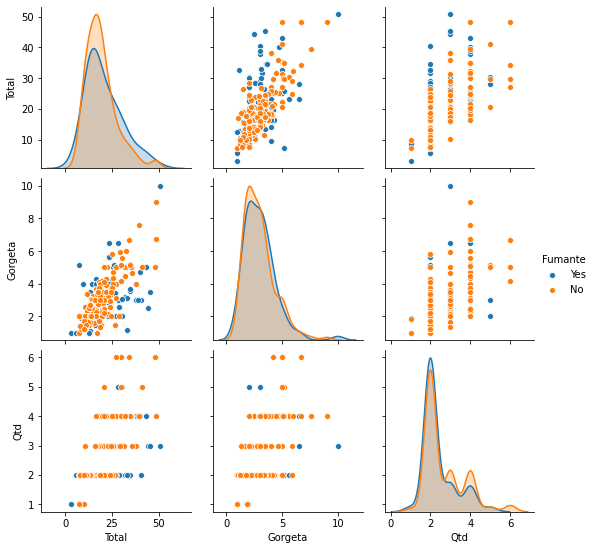

In [ ]:
sns.catplot(x=)

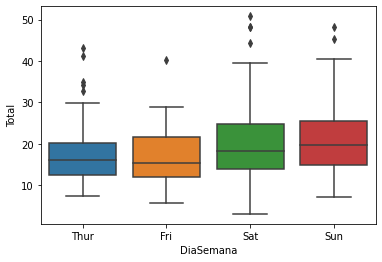

In [ ]:
sns.boxplot(x='DiaSemana', y='Total', data=gor)

In [ ]:
# O .query é utilizado para realizar 'perguntas' para o DATAFRAME.
# A forma de utilizar é entre 'com operador lógico" -> variavel <>==!= valorQueEuQuero
# A query foi 'periodo == 'almoco'
# almoco = gor.query('periodo == "almoco"').total
# sns.displot(almoco)

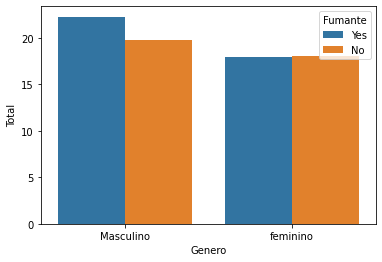

In [ ]:
sns.barplot(x='Genero', y='Total', data=gor, ci=None, hue='Fumante')

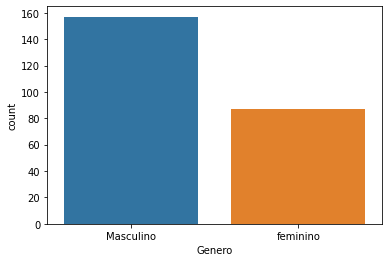

In [ ]:
# Plotando o número de ocorrências de uma observação sem relacionar
# com o outra variável.
sns.countplot(x='Genero', data=gor)

# Ultima aula

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('valores_vendas.csv', sep=';', index_col=[0])
df.sample(5)

,valor
data,
01/07/2015,218232
01/03/1995,130951
01/07/2013,332087
01/03/2014,224390
01/07/1990,51013


In [6]:
df.index = pd.to_datetime(df.index)

In [12]:
aux = df['1981-01':'2020-01'].resample('Y').sum()

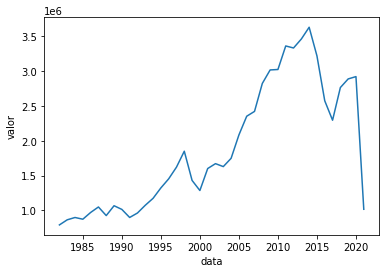

In [13]:
sns.lineplot(x=aux.index, y=aux.valor)

In [14]:
aux = df['1990':'2000'].resample('Y').sum()

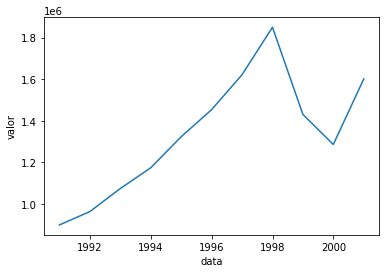

In [15]:
sns.lineplot(x=aux.index, y=aux.valor)

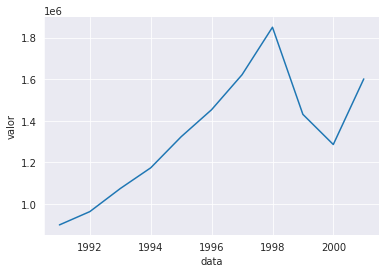

In [17]:
sns.set_style('darkgrid')
sns.lineplot(x=aux.index, y=aux.valor)
sns.despine(left=False)

In [ ]:
sns.lineplot(x=aux.index, y=aux.valor)
ax.set_title('Valores de vendas de automóveis - 2010 a 2020')
ax.figure.set_size_inches(12, 6)
ax.set_xlabel('Anos', fontsize=13)
ax.set_ylabel('Valor total', fontsize=15)

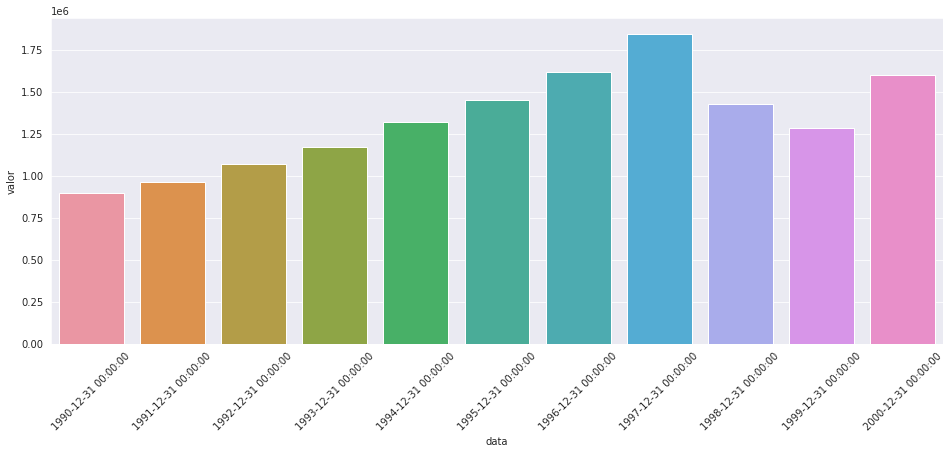

In [20]:
ax = sns.barplot(x=aux.index, y=aux.valor)
ax.figure.set_size_inches(16, 6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.xaxis.set_major_formatter(plt.FixedFormatter(aux.index))
ax = ax

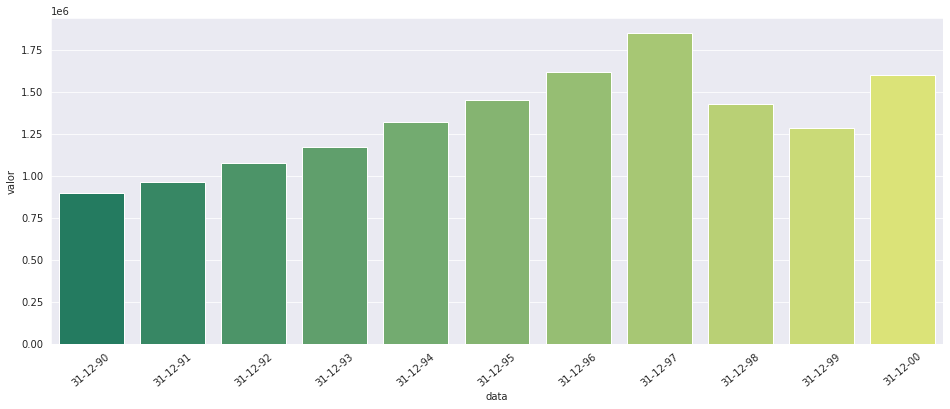

In [26]:
ax = sns.barplot(x=aux.index, y=aux.valor, palette='summer')
ax.figure.set_size_inches(16, 6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.xaxis.set_major_formatter(plt.FixedFormatter(aux.index.to_series().dt.strftime('%d-%m-%y')))
ax = ax

# Iniciando com Bokeh

In [27]:
!pip install bokeh

In [32]:
from bokeh.plotting import figure
from bokeh.io import output_file, show, output_notebook

In [30]:
x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 9, 10]

In [69]:
f = figure()
f
f.line(x=x, y=y)
output_notebook()
show(f)

In [70]:
from bokeh.sampledata.iris import flowers
flowers['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [73]:
f = figure()
f.circle(x=flowers['petal_length'], y=flowers['petal_width'])

GlyphRenderer(id='4178', ...)

In [74]:
output_notebook()
show(f)

In [75]:
f.plot_width = 1000
f.plot_height = 650
show(f)

In [78]:
f.plot_width = 500
f.plot_height = 400
f.background_fill_color = 'black'
f.background_fill_alpha = 0.7
f.title.text = 'Estrutura Iris'
f.title.text_font_size = '20px'
f.title.text_color = 'Blue'
f.title.text_font_style = 'bold'
f.title.text_font = 'courrier'
f.title.align = 'center'
show(f)

In [83]:
f.plot_width = 500
f.plot_height = 400

f.background_fill_color = 'white'
f.background_fill_alpha = 0.7
f.title.text = 'Estrutura Iris'
f.title.text_font_size = '20px'
f.title.text_color = 'Blue'
f.title.text_font_style = 'bold'
f.title.text_font = 'courrier'
f.title.align = 'center'

# alterando a cor dos traços do eixo X
f.xaxis.minor_tick_line_color = 'red'
f.xaxis.minor_tick_in = 2
f.xaxis.axis_label = "Comprimento"
f.xaxis.axis_label_text_font_size = '30px'
f.yaxis.axis_label = 'Largura'
show(f)